# Investigating Data on No-Show Appointments
by Baily Jepsen

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset was collected from the Kaggle website. It contains data on 110,527 medical appointments in 2016 Brazil. The dataset utilizes 14 characteristics to describe each appointment. These variables are Patient ID, Appointment ID, Gender, Scheduled Day, Appointment Day, Hypertension, Diabetes, Alcoholism, Handicap, SMS Received, and No-Show. According to the dataset content information on Kaggle, the No-Show variable is the most significant and it is also the dependent variable. This makes sense since the data was collected in the pusuit of undestanding why 30% of patients miss their scheduled appointments.

> The analysis that I intend to implement is one that investigates some of the variables that may influence a patient's ability to show up for their appointment. SMS systems can require a lot from a business's resources, so analyzing the efficiency of their purpose could produce some interesting information. I will also investigate if the number of handicaps that a patient has could be a factor. This potential relationship is ingriguing because one would think that there would be a positive correlation. As the number of handicaps increase, the harder it is to be mobile, and therefore you would miss more appointments. 

### Questions for Analysis

> **<a href="#q1">Question 1</a>**
> Does receiving a SMS help patients show up?

> **<a href="#q2">Question 2</a>**
> Does number of handicaps (Financial, Hypertension, Diabetes, and/or Alcoholism) impact a patient's ability to show up for their appointment?

In [77]:
# Import statements for packages.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 4.2MB/s eta 0:00:01   12% |████                            | 1.3MB 28.7MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.8MB/s eta 0:00:01   20% |██████▌                         | 2.7MB 28.7MB/s eta 0:00:01    40% |█████████████                   | 5.4MB 30.5MB/s eta 0:00:01    51% |████████████████▌               | 6.9MB 28.2MB/s eta 0:00:01    71% |██████████████████████▉         | 9.5MB 28.4MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling

### General Properties

> First I will display the first five entries in the dataset.

In [78]:
# Loading the data and displaying some rows.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Next I will confirm the number of rows and columns in the dataset.

In [79]:
rows = df.shape[0]
columns = df.shape[1]
print('There are {} rows and {} columns in the dataset.'.format(rows, columns))

There are 110527 rows and 14 columns in the dataset.


### Duplicated/Missing Data

> First I will find if there are any duplicated rows in the dataset.

In [80]:
duplicated_rows = sum(df.duplicated())
print('There are {} duplicated rows in the dataset.'.format(duplicated_rows))

There are 0 duplicated rows in the dataset.


> Next I will find if there are any variables with missing values.

In [81]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> There are no missing values in any of the columns. 

### Column Properties

> First I will list each columns data type.

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> This data is composed of string, integer, and decimal values. 

> Next I will find the number of unique values in each column.

In [83]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Data Cleaning

> This dataset does not require much cleaning since there are no duplicate rows, missing data, or extraneous columns. After searching through the discussions on this dataset, I did find that there is one or more entries that indicate an unborn child, which can be found by searching for the value of -1 in the age column. This entry could be considered a duplicate since the mother is already probably recorded for the appointment, and it can be seen as an outlier because an unborn child has no control over whether or not they make it to an appointment.

> In order to clean this data I will rename some columns so that they are more easy to work with, change the data type of one column so that it is easier to plot later in the investigation, and remove any entires that have an age of -1 or less.

In [84]:
# Strip any trailing/leading spaces and turn all letters into lowercase letters.
df.rename(columns=lambda x : x.strip().lower(), inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> All column labels are now in lowercase.

In [85]:
# Insert underscores and fix spelling.
df.rename(columns={'patientid': 'patient_id'}, inplace=True)
df.rename(columns={'appointmentid': 'appointment_id'}, inplace=True)
df.rename(columns={'scheduledday': 'scheduled_day'}, inplace=True)
df.rename(columns={'appointmentday': 'appointment_day'}, inplace=True)
df.rename(columns={'hipertension': 'hypertension'}, inplace=True)
df.rename(columns={'handcap': 'handicap'}, inplace=True)
df.rename(columns={'no-show': 'no_show'}, inplace=True)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> All column labels now follow the same naming convention.

In [86]:
# Change the data type of sms_received from integer to string.
df['sms_received'] = df['sms_received'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null object
no_show            110527 non-null object
dtypes: float64(1), int64(7), object(6)
memory usage: 11.8+ MB


In [87]:
# Change all occurences of "0" to "No" and "1" to "Yes" in the sms_received
# column.
df['sms_received'] = df['sms_received'].str.replace('0', 'No')
df['sms_received'] = df['sms_received'].str.replace('1', 'Yes')
df['sms_received'].unique()

array(['No', 'Yes'], dtype=object)

> I changed the data type of the sms_received column from an integer to a string and changed all occurences of "0" to "No" and "1" to "Yes" because I will be plotting with this data later and this change will make the labels easier to understand.

In [88]:
# Search the dataframe for any entries that have an age of -1 or less.
fetus = df.query('age <= -1')
fetus

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,No,No


> There is one entry with an age of -1.

In [89]:
# Create a new dataframe without the row that we found above.
df_clean = df.query('age > -1')
fetus = df_clean.query('age <= -1')
fetus

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


> There are no longer any entries with an age of less than zero. The dataset cleaning is complete.

<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
### Q1: Does receiving a SMS help patients show up?

> In this digital age it is imperative to know if our efforts in utilizing electronic devices is productive. In an investigation found on Statista, it was found that mobile phones were found in 93% of households (Laricchia, 2022). This investigation was conducted from 2016 - 2018, around the same time as the dataset that we are working with in this report.

> Age can also be a factor in this relationship. In another investigation found on Statista, most children do not have their own mobile phone until the ages of 11/12 (O'Dea, 2021). We should observe the age distributions of those who did and did not receive a SMS. 

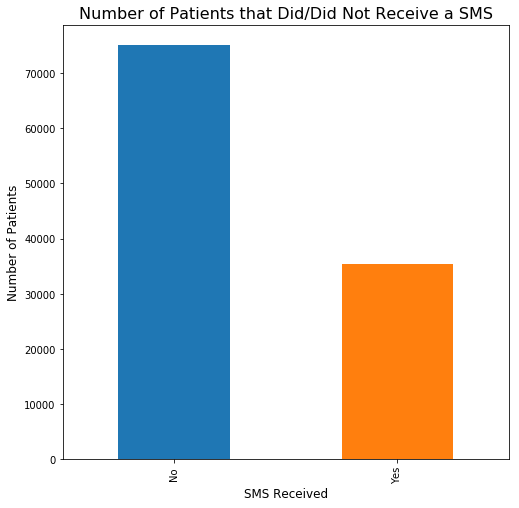

In [90]:
# Plot the data.
df_clean['sms_received'].value_counts().plot(kind='bar', figsize=(8,8));
plt.title('Number of Patients that Did/Did Not Receive a SMS', fontsize=16);
plt.xlabel('SMS Received', fontsize=12);
plt.ylabel('Number of Patients', fontsize=12);

> Out of the 110,527 patients in this dataset, 75,044 did not receive a SMS about their appointment while 35,482 did.

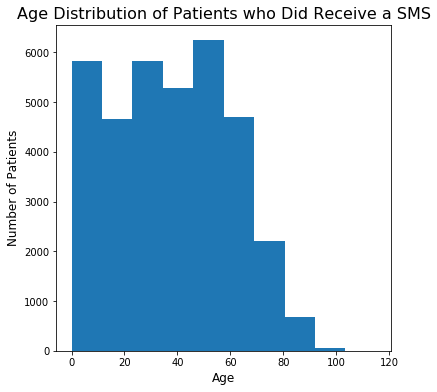

In [91]:
# Create a new dataframe of patients who received an SMS.
df_yes = df_clean.query('sms_received == "Yes"')

# Plot the age distribution of patients who received an SMS. 
df_yes['age'].plot(kind='hist', figsize=(6,6));
plt.title('Age Distribution of Patients who Did Receive a SMS', fontsize=16);
plt.xlabel('Age', fontsize=12);
plt.ylabel('Number of Patients', fontsize=12);

> The distribution of ages is slightly skewed right. I expected more of a even distribution since most children do not receive their first mobile phone until the ages of 11/12. Logically, I would expect the number of patients between the ages of 0-10 (the first bar in the histogram) to be similar to the number of patients between the ages of 90-100 (the last bar in the histogram). 

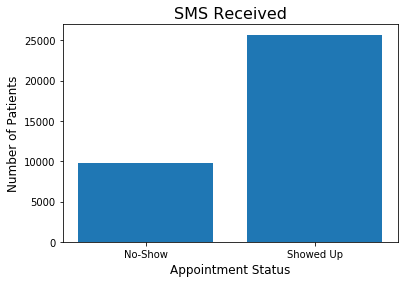

In [92]:
# Create two more dataframes of patients who did and did not show up to their
# appointment.
df_yes_yes_show = df_yes.query('no_show == "No"')
df_yes_no_show = df_yes.query('no_show == "Yes"')

# Plot the data.
plt.bar(['Showed Up', 'No-Show'], [df_yes_yes_show.shape[0], df_yes_no_show.shape[0]]);
plt.title('SMS Received', fontsize=16);
plt.xlabel('Appointment Status', fontsize=12);
plt.ylabel('Number of Patients', fontsize=12);

> Out of 35,482 patients who received a SMS about their appointment, 9,784 did not show up for their appointment (27.57%). If every patient in this dataset of 110,527 received an SMS, then about 30,472 would probably not show up while about 80,055 would. 

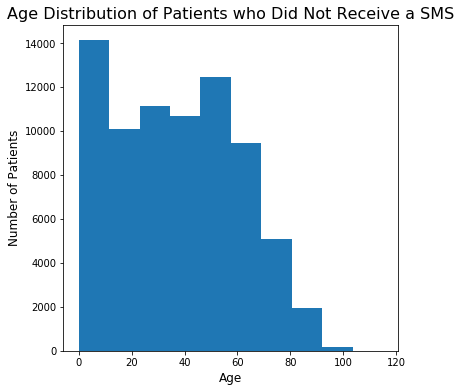

In [94]:
# Create a new dataframe of patients who did not receive an SMS.
df_no = df_clean.query('sms_received == "No"')

# Plot the age distribution of patients who received an SMS. 
df_no['age'].plot(kind='hist', figsize=(6,6));
plt.title('Age Distribution of Patients who Did Not Receive a SMS', fontsize=16);
plt.xlabel('Age', fontsize=12);
plt.ylabel('Number of Patients', fontsize=12);

> The distribution of ages is slightly skewed right. The shape of this histogram makes sense since most children do not receive their first mobile phone until the ages of 11/12.

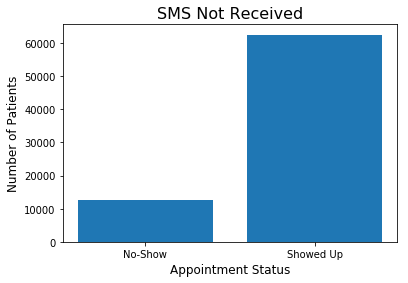

In [95]:
# Create two more dataframes of patients who did and did not show up to their
# appointment.
df_no_yes_show = df_no.query('no_show == "No"')
df_no_no_show = df_no.query('no_show == "Yes"')

# Plot the data.
plt.bar(['Showed Up', 'No-Show'], [df_no_yes_show.shape[0], df_no_no_show.shape[0]]);
plt.title('SMS Not Received', fontsize=16);
plt.xlabel('Appointment Status', fontsize=12);
plt.ylabel('Number of Patients', fontsize=12);

> Out of 75,045 patients who did not receive a SMS about their appointment, 12,535 did not show up for their appointment (16.70%). If every patient in this dataset of 110,527 did not receive an SMS, then about 18,458 would probably not show up while about 92,069 would. 

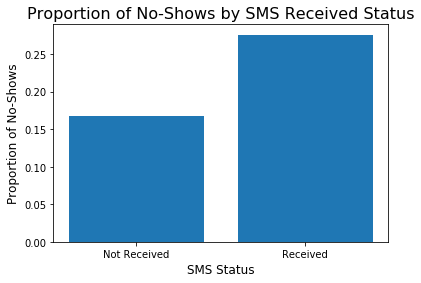

In [96]:
# Calculate proportions 
total_received = df_yes_yes_show.shape[0] + df_yes_no_show.shape[0]
total_not_received = df_no_yes_show.shape[0] + df_no_no_show.shape[0]

prop_received = df_yes_no_show.shape[0] / total_received
prop_not_received = df_no_no_show.shape[0] / total_not_received

# Plot the data.
plt.bar(['Received', 'Not Received'], [prop_received, prop_not_received]);
plt.title('Proportion of No-Shows by SMS Received Status', fontsize=16);
plt.xlabel('SMS Status', fontsize=12);
plt.ylabel('Proportion of No-Shows', fontsize=12);

<a id='q2'></a>
### Q2: Does number of handicaps (Financial, Hypertension, Diabetes, and/or Alcoholism) impact a patient's ability to show up for their appointment?

> The handicap column contains values ranging from 0 to 4 indicating the number of handicaps a patient has. Let's investigate the correlation between this number and whether or not the patient showed up for their appointment.

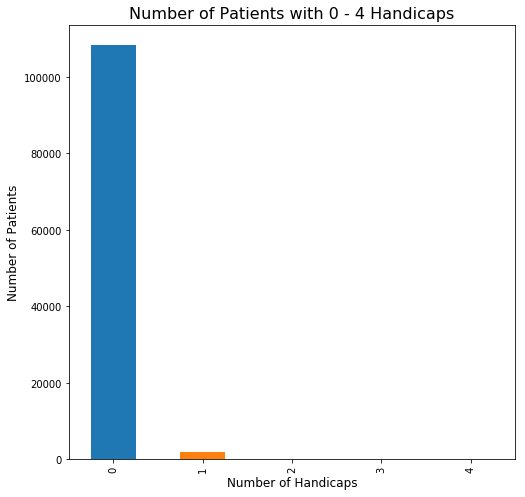

In [97]:
# Plot the data.
df_clean['handicap'].value_counts().plot(kind='bar', figsize=(8,8));
plt.title('Number of Patients with 0 - 4 Handicaps', fontsize=16);
plt.xlabel('Number of Handicaps', fontsize=12);
plt.ylabel('Number of Patients', fontsize=12);

> There are a lot more patients who do not have any handicaps versus those who have one or more. Because of this, I am going to assess each value individually. 

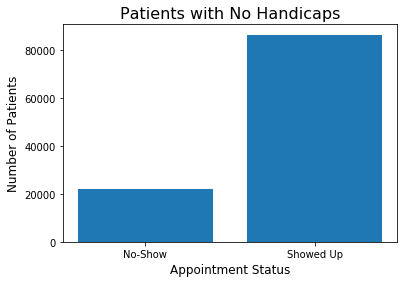

In [98]:
# Create a new dataframe of patients who do not have any handicaps.
df_0 = df_clean.query('handicap == 0')

# Create two more dataframes of patients who did and did not show up to their
# appointment.
df_0_yes = df_0.query('no_show == "No"')
df_0_no = df_0.query('no_show == "Yes"')

# Plot the data.
plt.bar(['Showed Up', 'No-Show'], [df_0_yes.shape[0], df_0_no.shape[0]]);
plt.title('Patients with No Handicaps', fontsize=16);
plt.xlabel('Appointment Status', fontsize=12);
plt.ylabel('Number of Patients', fontsize=12);

> Out of 108,256 patients who do not have a handicap, 21,912 did not show up for their appointment (20.24%). If every patient in this dataset of 110,527 did not have a handicap, then about 22,371 would probably not show up while about 88,156 would. 

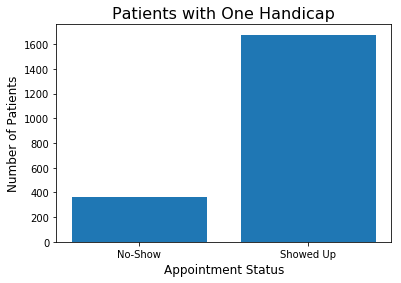

In [99]:
# Create a new dataframe of patients who have one handicap.
df_1 = df_clean.query('handicap == 1')

# Create two more dataframes of patients who did and did not show up to their
# appointment.
df_1_yes = df_1.query('no_show == "No"')
df_1_no = df_1.query('no_show == "Yes"')

# Plot the data.
plt.bar(['Showed Up', 'No-Show'], [df_1_yes.shape[0], df_1_no.shape[0]]);
plt.title('Patients with One Handicap', fontsize=16);
plt.xlabel('Appointment Status', fontsize=12);
plt.ylabel('Number of Patients', fontsize=12);

> Out of 2,042 patients who have one handicap, 366 did not show up for their appointment (17.92%). If every patient in this dataset of 110,527 had one handicap, then about 19,806 would probably not show up while about 90,721 would. 

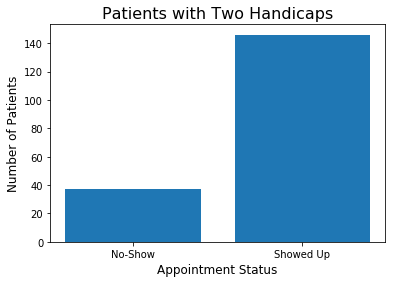

In [100]:
# Create a new dataframe of patients who have two handicaps.
df_2 = df_clean.query('handicap == 2')

# Create two more dataframes of patients who did and did not show up to their
# appointment.
df_2_yes = df_2.query('no_show == "No"')
df_2_no = df_2.query('no_show == "Yes"')

# Plot the data.
plt.bar(['Showed Up', 'No-Show'], [df_2_yes.shape[0], df_2_no.shape[0]]);
plt.title('Patients with Two Handicaps', fontsize=16);
plt.xlabel('Appointment Status', fontsize=12);
plt.ylabel('Number of Patients', fontsize=12);

> Out of 183 patients who have two handicaps, 37 did not show up for their appointment (20.22%). If every patient in this dataset of 110,527 had two handicaps, then about 22,349 would probably not show up while about 88,178 would. 

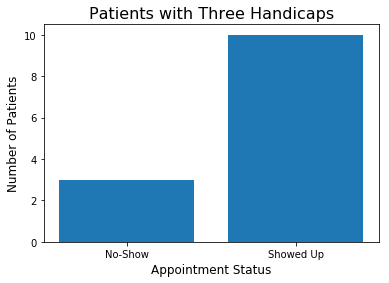

In [101]:
# Create a new dataframe of patients who have three handicaps.
df_3 = df_clean.query('handicap == 3')

# Create two more dataframes of patients who did and did not show up to their
# appointment.
df_3_yes = df_3.query('no_show == "No"')
df_3_no = df_3.query('no_show == "Yes"')

# Plot the data.
plt.bar(['Showed Up', 'No-Show'], [df_3_yes.shape[0], df_3_no.shape[0]]);
plt.title('Patients with Three Handicaps', fontsize=16);
plt.xlabel('Appointment Status', fontsize=12);
plt.ylabel('Number of Patients', fontsize=12);

> Out of 13 patients who have three handicaps, 3 did not show up for their appointment (23.08%). If every patient in this dataset of 110,527 had three handicaps, then about 25,510 would probably not show up while about 85,017 would. 

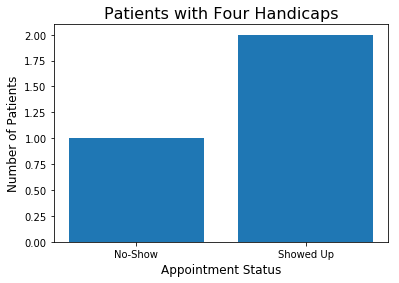

In [102]:
# Create a new dataframe of patients who have four handicaps.
df_4 = df_clean.query('handicap == 4')

# Create two more dataframes of patients who did and did not show up to their
# appointment.
df_4_yes = df_4.query('no_show == "No"')
df_4_no = df_4.query('no_show == "Yes"')

# Plot the data.
plt.bar(['Showed Up', 'No-Show'], [df_4_yes.shape[0], df_4_no.shape[0]]);
plt.title('Patients with Four Handicaps', fontsize=16);
plt.xlabel('Appointment Status', fontsize=12);
plt.ylabel('Number of Patients', fontsize=12);

> Out of 3 patients who have four handicaps, 1 did not show up for their appointment (33.33%). If every patient in this dataset of 110,527 had four handicaps, then about 36,842 would probably not show up while about 73,685 would. 

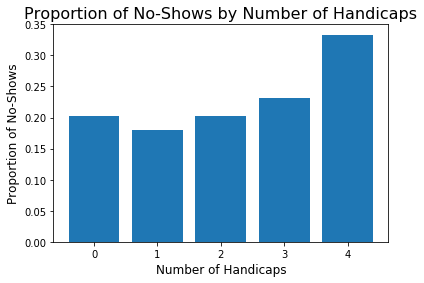

In [103]:
# Calculate proportions 
prop_0 = df_0_no.shape[0] / df_0.shape[0]
prop_1 = df_1_no.shape[0] / df_1.shape[0]
prop_2 = df_2_no.shape[0] / df_2.shape[0]
prop_3 = df_3_no.shape[0] / df_3.shape[0]
prop_4 = df_4_no.shape[0] / df_4.shape[0]

# Plot the data.
plt.bar(['0', '1', '2', '3', '4'], [prop_0, prop_1, prop_2, prop_3, prop_4]);
plt.title('Proportion of No-Shows by Number of Handicaps', fontsize=16);
plt.xlabel('Number of Handicaps', fontsize=12);
plt.ylabel('Proportion of No-Shows', fontsize=12);

<a id='conclusions'></a>
## Conclusions

### Q1: Does receiving a SMS help patients show up?
> There is a 10.87% difference in attendance between those who receive a SMS about their appointment and those who do not. In a pool of 100,000 people that is about 10,870 people who do not show up to their appointment. Based on the findings in this investigation, we can conclude that receiving a SMS about your appointment is not very effective at getting patients to show up, though not by much. 

> More data should be collected as well as a more thorough investigation into this correlation is needed. Since mobile phones are quite prevalent in Brazilian households, one would think that since more patients have access to such a device that they would generally be more productive (Laricchia, 2022). 

### Q2: Does number of handicaps (Financial, Hypertension, Diabetes, and/or Alcoholism) impact a patient's ability to show up for their appointment?
> There is at most about a 5% difference in attendance between those who have 0 - 3 handicaps. This does not indicate any correlation. In a pool of 100,000 people that is a difference of about 5,000. Unfortunately, due to the limited number of patients who have 4 handicaps, I cannot make any conclusions on this part of the data. Based on the findings in the rest of this investigation, it is hard to conclude if handicaps influence a patient's ability to make it to their appointment due to a limited amount of data.

> If this is a relationship that is going to be investigated further, then there needs to be a larger amount of data collected on those who have handicaps.

### Limitation

> A limitation that I encountered in the investigation of this dataset is how data was recorded for infants. There are numerous entries that do not make sense. Examples of this are entries that have an age of -1 in order to indicate an unborn child, and entries that have an age of 0 but are still receiving a SMS. Unborn children and children too young to control whether or not they arrive at their appointment can skew the data.

> Another limitation that I encountered is a lack of data on patients with handicaps. There are 110,527 entries and only 2,271 had any kind of handicap. This is a very small pool of data to work with, thus making it difficult to come to any clear conclusion or correlation on their potential influence. 

## References

> Hoppen, J. or Aquarela Advanced Analytics. (2016). *Medical appointment no shows* (v5). Kaggle. https://www.kaggle.com/datasets/joniarroba/noshowappointments

> Laricchia, F. (2022). *Number of mobile phone users in Brazil from 2016 to 2018.* Statista. https://www.statista.com/statistics/274695/forecast-of-mobile-phone-users-in-brazil/#statisticContainer

> O'Dea, S. (2021) *What age are kids when parents first buy/give them their own cell phone?* Statista. https://www.statista.com/statistics/1058938/cell-phone-owhnership-among-children-in-the-us-by-age/

In [104]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0